In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import math
import scipy.stats as stats
import pickle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from matplotlib import colors

In [4]:
df = pd.read_csv('dataset1.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
df['TotalCharges'].dtype

dtype('O')

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [14]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df.shape

(7043, 20)

In [18]:
df = df.drop('Churn', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [19]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50


In [20]:
for i in df.columns:
  if df[i].dtypes=='object':
    print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
df = df.apply(preprocessing.LabelEncoder().fit_transform) 

In [22]:
ds = df
scaler = StandardScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=df.columns)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674


In [24]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,3700
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,6304
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,1265
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,1157
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,1388,6150


In [25]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.131766,-1.558384
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.387740,0.266039
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.517317,-1.320952
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.872611,0.238287
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.095041,-1.250031


In [26]:
ds.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.642612,0.305097
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.372008,1.643349
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.142216,-0.946303
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.232979,-1.001806
7042,0.990532,-0.439916,-0.966622,-0.654012,1.369379,0.327438,-0.991588,0.172250,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,1.570749,0.829798,-1.474052,1.472327,1.564205


In [27]:
seg_X = ds

In [28]:
seg_X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.131766,-1.558384
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.387740,0.266039
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.517317,-1.320952
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.872611,0.238287
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.095041,-1.250031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.642612,0.305097
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.372008,1.643349
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.142216,-0.946303
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.232979,-1.001806


In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    km = KMeans(i)
    km.fit(seg_X)
    wcss.append(km.inertia_)
np.array(wcss)

array([133817.        , 112697.41567098, 102323.55302682,  95722.77906389,
        90531.67024226,  87270.08859336,  84041.11789259,  81272.75170566,
        79443.89307566,  77644.19092456,  76554.73318116,  74712.0052821 ,
        73508.35479699,  72116.62817976])

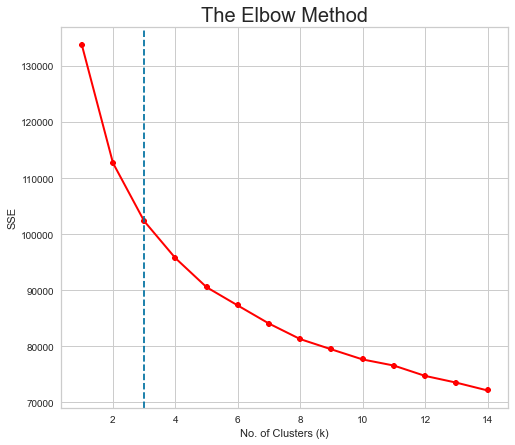

In [30]:
fig, ax = plt.subplots(figsize=(8,7))
ax = plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('SSE')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
sil=[]
for i in range(2,10):
    km = KMeans(n_clusters = i)
    km.fit_predict(seg_X)
    score = silhouette_score(seg_X,km.labels_)
    sil.append(score)
np.array(sil)

array([0.15158337, 0.13131519, 0.14739949, 0.1415801 , 0.1417999 ,
       0.11614278, 0.11668891, 0.1161556 ])

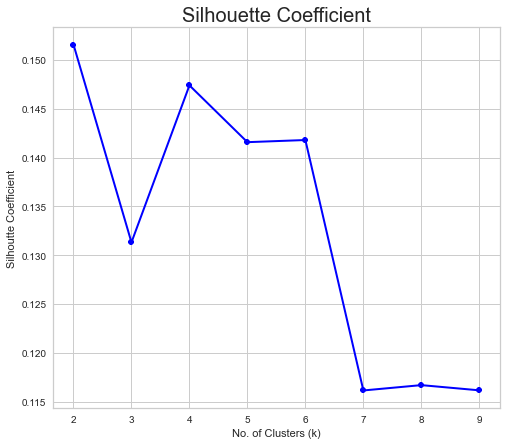

In [32]:
fig, ax = plt.subplots(figsize=(8,7))
ax = plt.plot(range(2,10),sil, linewidth=2, color="blue", marker ="8")
#plt.axvline(x=3, ls='--')
plt.ylabel('Silhoutte Coefficient')
plt.xlabel('No. of Clusters (k)')
plt.title('Silhouette Coefficient', fontsize = 20)
plt.show()

In [33]:
kms = KMeans(n_clusters=3, init='k-means++')
kms.fit(seg_X)

KMeans(n_clusters=3)

In [34]:
clusters = seg_X.copy();
clusters['Cluster_Prediction'] = kms.fit_predict(seg_X)
print(clusters)

        gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1     0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2     0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3     0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4    -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
...        ...            ...       ...         ...       ...           ...   
7038  0.990532      -0.439916  1.034530    1.529024 -0.340876      0.327438   
7039 -1.009559      -0.439916  1.034530    1.529024  1.613701      0.327438   
7040 -1.009559      -0.439916  1.034530    1.529024 -0.870241     -3.054010   
7041  0.990532       2.273159  1.034530   -0.654012 -1.155283      0.327438   
7042  0.990532      -0.439916 -0.966622   -0.654012  1.369379      0.327438   

      MultipleLines  InternetService  OnlineSecurit

In [35]:
count_samples = clusters['Cluster_Prediction'].value_counts()
print("Samples in cluster 1: ",count_samples[0])
print("Samples in cluster 2: ",count_samples[1])
print("Samples in cluster 3: ",count_samples[2])

Samples in cluster 1:  3010
Samples in cluster 2:  2493
Samples in cluster 3:  1540


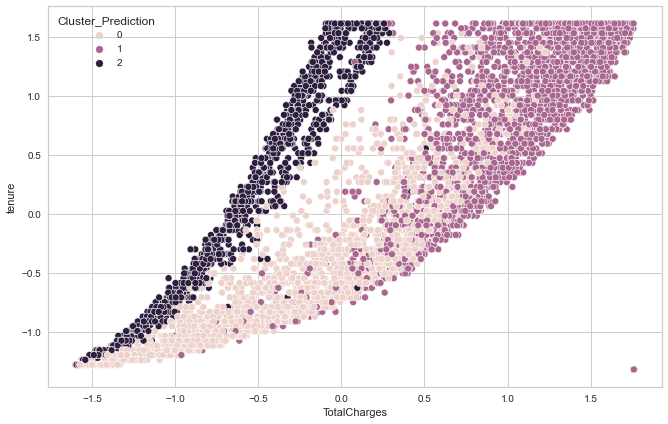

In [36]:
fig = plt.figure(figsize=(11,7))
sns.scatterplot(data = df,x=clusters["TotalCharges"], y=clusters["tenure"],hue=clusters["Cluster_Prediction"])
plt.show()

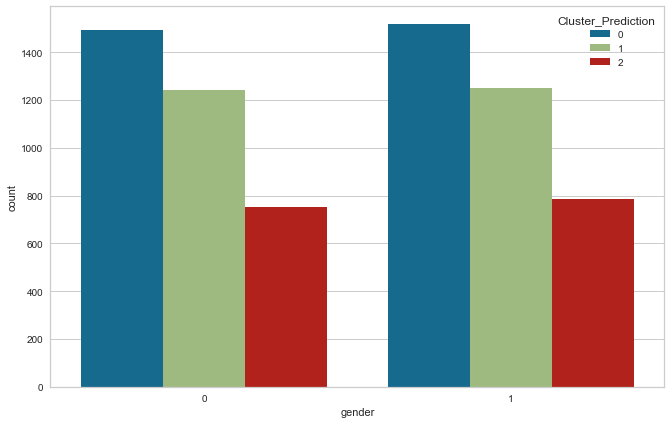

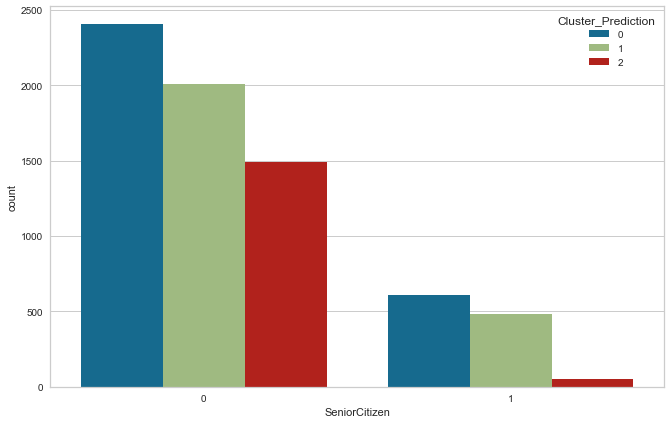

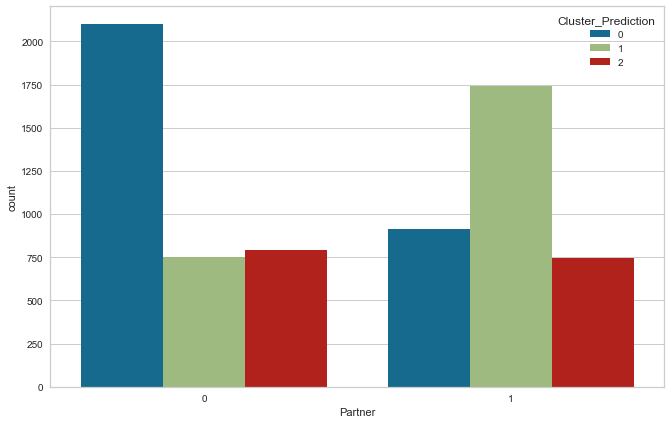

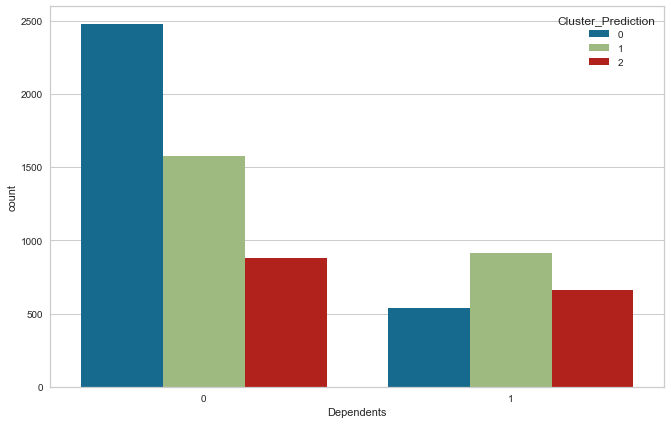

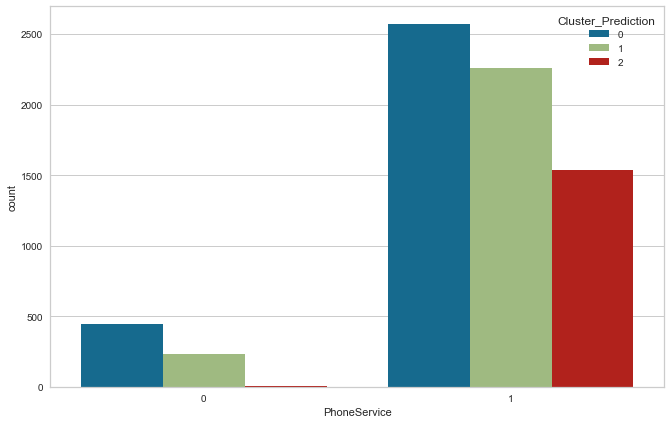

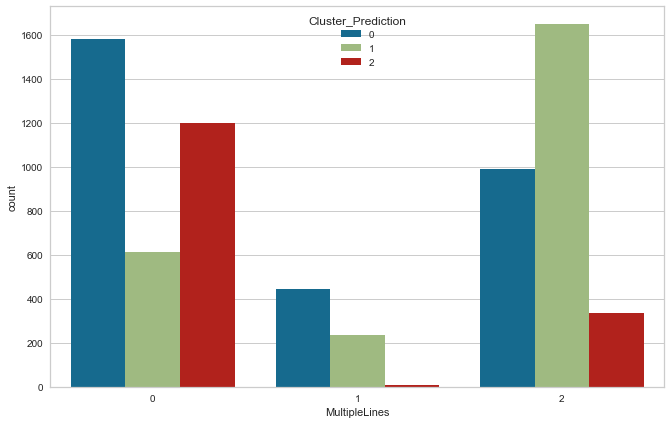

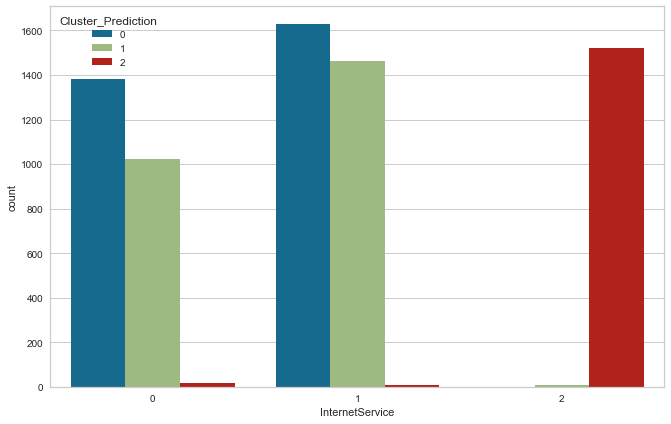

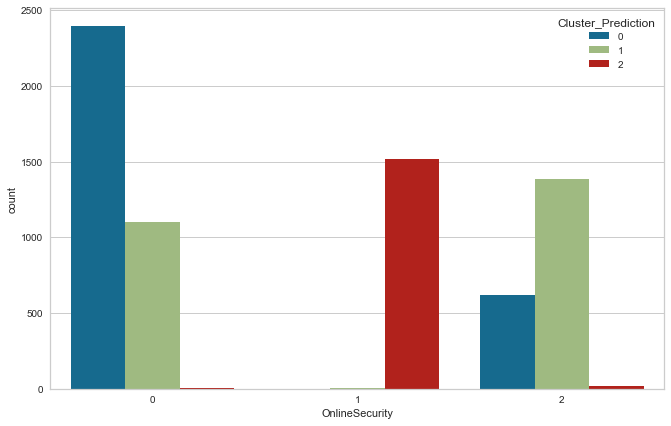

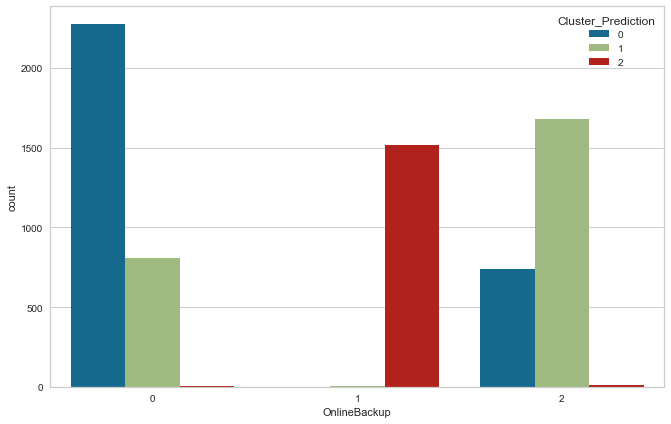

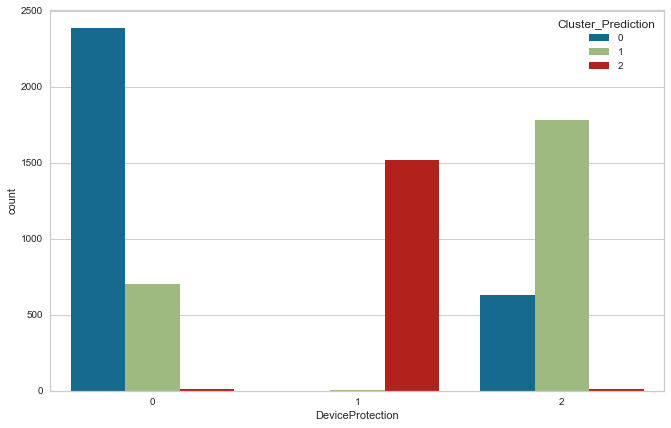

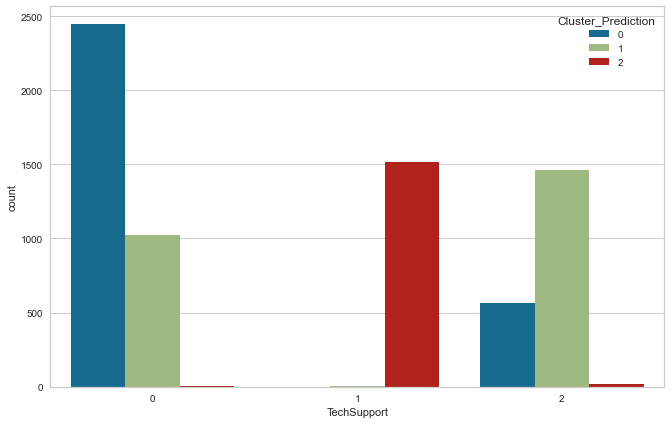

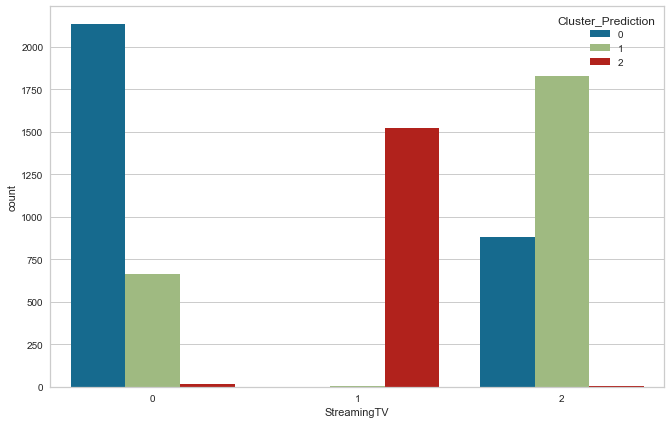

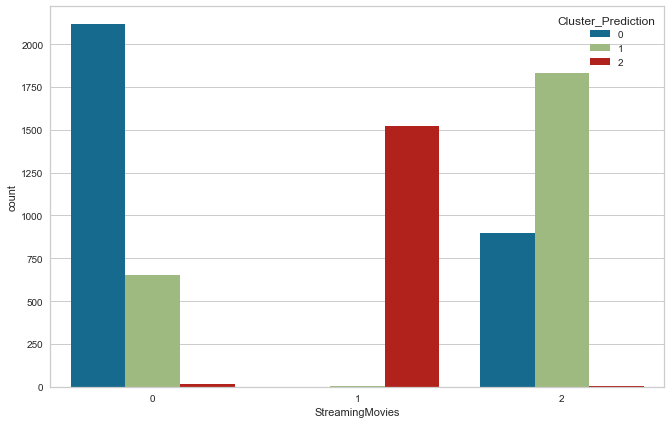

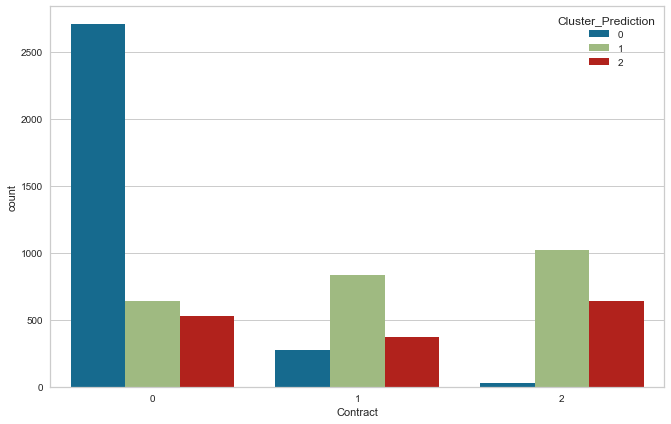

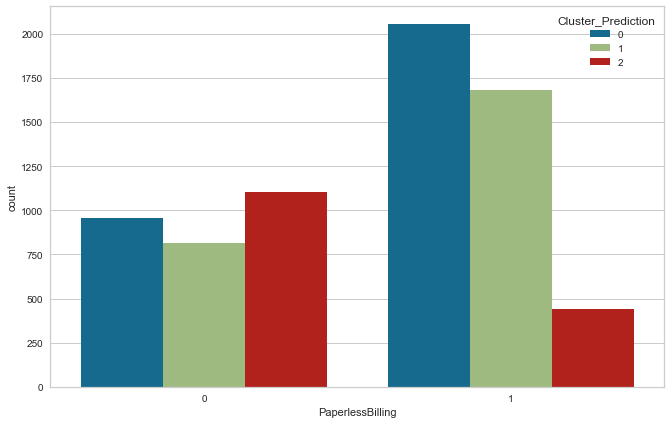

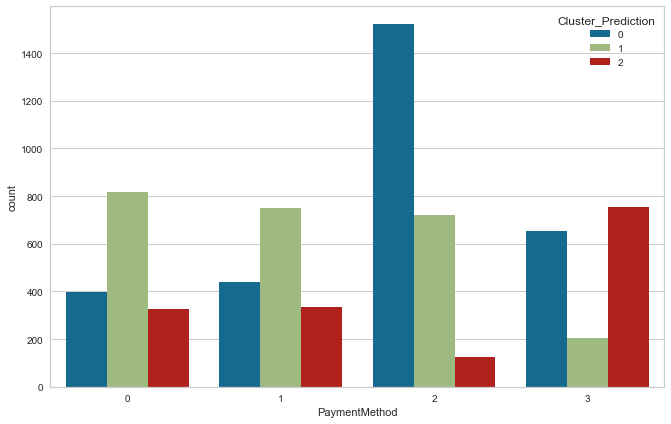

In [37]:
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
  fig = plt.figure(figsize=(11,7))
  sns.countplot(x=df[col],hue=clusters["Cluster_Prediction"])
  plt.show()

gender : ['Female'(0) 'Male'(1)]\
Partner : ['Yes'(1) 'No'(0)]\
Dependents : ['No(0)' 'Yes(1)']\
PhoneService : ['No(0)' 'Yes(1)']\
MultipleLines : ['No phone service(1)' 'No(0)' 'Yes(2)']\
InternetService : ['DSL(0)' 'Fiber optic(1)' 'No(2)']\
OnlineSecurity : ['No(0)' 'Yes(2)' 'No internet service(1)']\
OnlineBackup : ['Yes(2)' 'No(0)' 'No internet service(1)']\
DeviceProtection : ['No(0)' 'Yes(2)' 'No internet service(1)']\
TechSupport : ['No(0)' 'Yes()' 'No internet service']\
StreamingTV : ['No' 'Yes' 'No internet service']\
StreamingMovies : ['No' 'Yes' 'No internet service']\
Contract : ['Month-to-month' 'One year' 'Two year']\
PaperlessBilling : ['Yes' 'No']\
PaymentMethod : ['Electronic check(2)' 'Mailed check(3)' 'Bank transfer (automatic)'\(0)
 'Credit card (automatic)(1)']

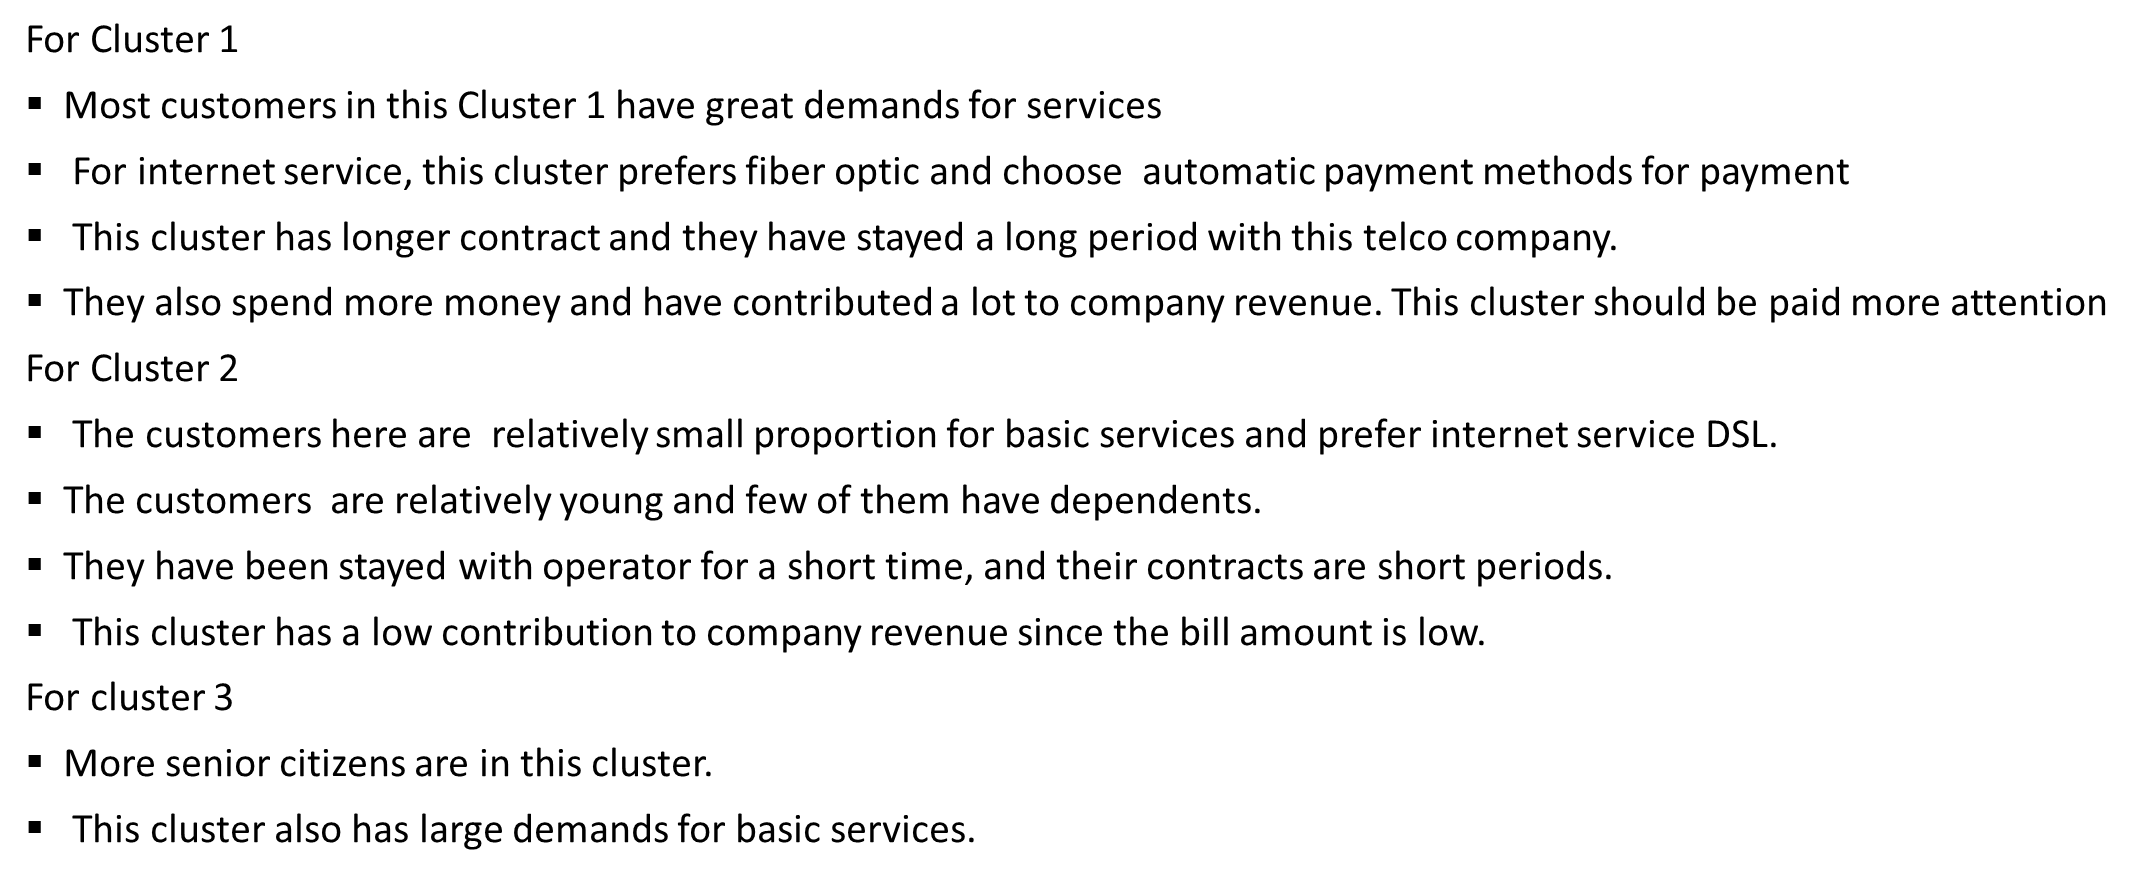